<a href="https://colab.research.google.com/github/jkeza1/Group7_water-quality-model/blob/main/keza_joan_of_formative_ii_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.optimizers import Adagrad
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
#LOAD THE DATA
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


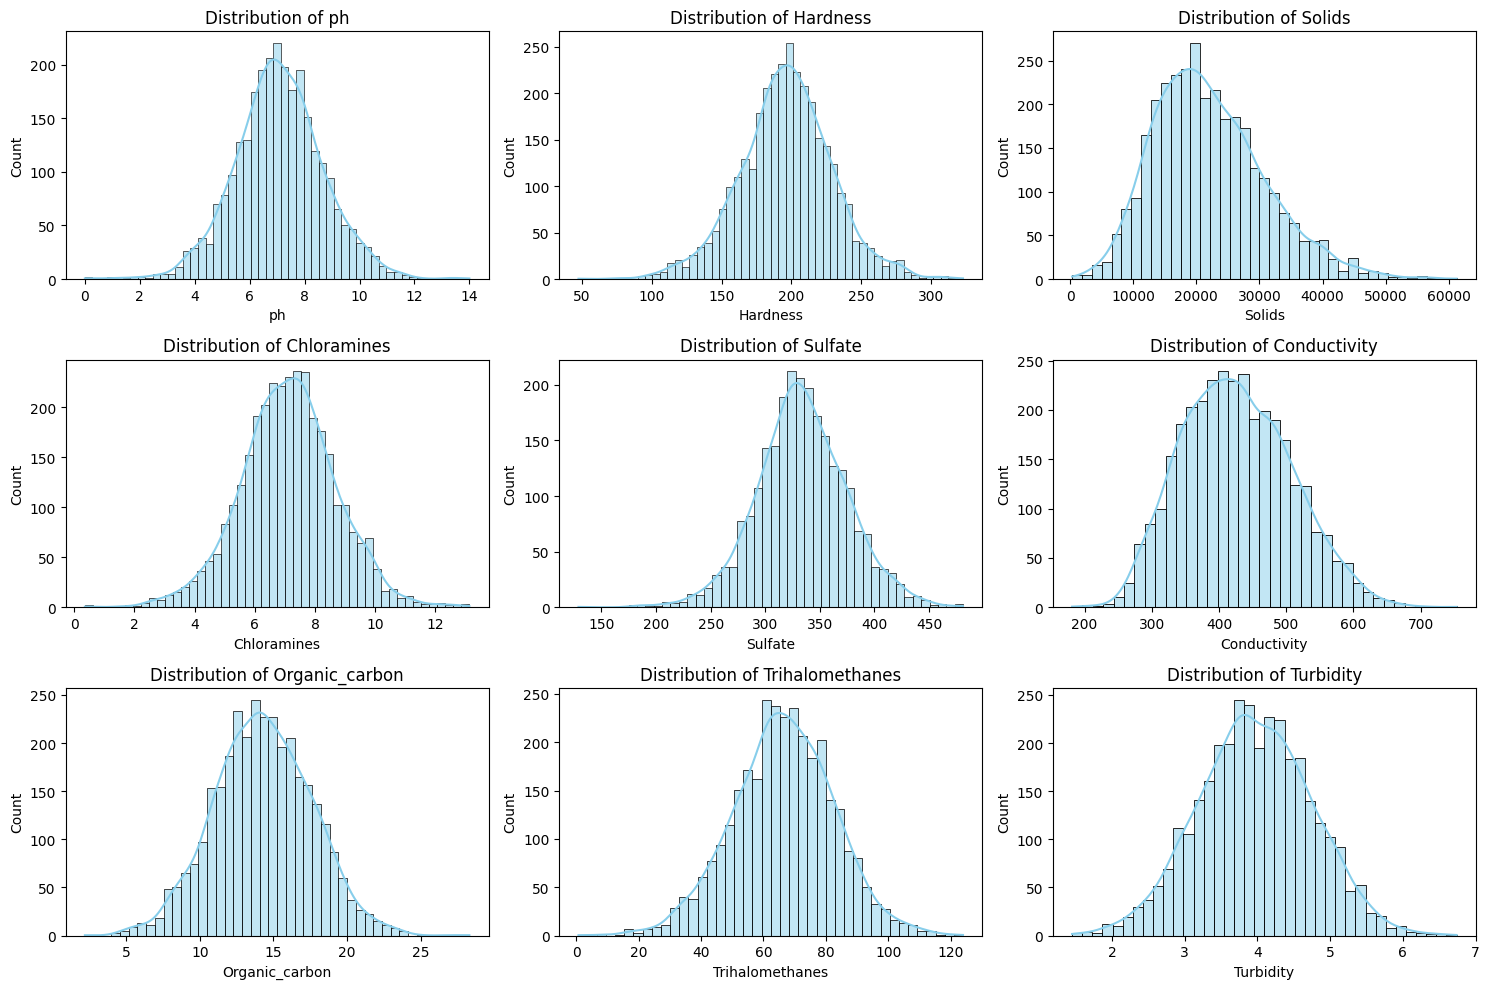

In [3]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [4]:
# --- Data Preprocessing ---
data = data.interpolate(inplace=False).bfill().ffill()

X = data.drop('Potability', axis=1)
y = data['Potability']

In [5]:
class_counts = data['Potability'].value_counts()

print("Class distribution:")
print(class_counts)

Class distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [6]:
#from sklearn import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Each Member Defines their model Here

In [25]:
def water_quality_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001), input_shape=(input_dim,)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adagrad(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


    return model

# Start the training Process

In [26]:
model = water_quality_model(X_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
optimizer = Adagrad(learning_rate=0.01)

In [28]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    min_delta=0.005,
    restore_best_weights=True
)

In [30]:

# Compute weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: weights[0], 1: weights[1]}


In [31]:
loss, accuracy = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4728 - loss: 1.0243  


In [32]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
y_pred = model.predict(X_test)
print("y_pred shape:", y_pred.shape)


X_test shape: (492, 9)
y_test shape: (492,)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
y_pred shape: (492, 1)


In [38]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4717 - loss: 1.0208 - val_accuracy: 0.4908 - val_loss: 1.0055
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5274 - loss: 0.9940 - val_accuracy: 0.5031 - val_loss: 0.9974
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5207 - loss: 0.9909 - val_accuracy: 0.5173 - val_loss: 0.9879
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5405 - loss: 0.9698 - val_accuracy: 0.4888 - val_loss: 0.9865
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5242 - loss: 0.9765 - val_accuracy: 0.5071 - val_loss: 0.9770
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5236 - loss: 0.9724 - val_accuracy: 0.5132 - val_loss: 0.9699
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5321 - loss: 0.9653 - val_accuracy: 0.5255 - val_loss: 0.9648
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5523 - loss: 0.9538 - val_accuracy: 0.5214 - v

In [33]:
# If X_test is a DataFrame or 3D array, flatten it
if len(X_test.shape) > 2:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

# Predict again
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten everything for comparison
y_pred_flat = y_pred_binary.flatten()
y_test_flat = y_test.to_numpy().flatten()

# Now compare
cm = confusion_matrix(y_test_flat, y_pred_flat)
report = classification_report(y_test_flat, y_pred_flat)
print(report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.70      0.32      0.44       307
           1       0.41      0.77      0.53       185

    accuracy                           0.49       492
   macro avg       0.55      0.55      0.49       492
weighted avg       0.59      0.49      0.47       492



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.70      0.32      0.44       307
           1       0.41      0.77      0.53       185

    accuracy                           0.49       492
   macro avg       0.55      0.55      0.49       492
weighted avg       0.59      0.49      0.47       492



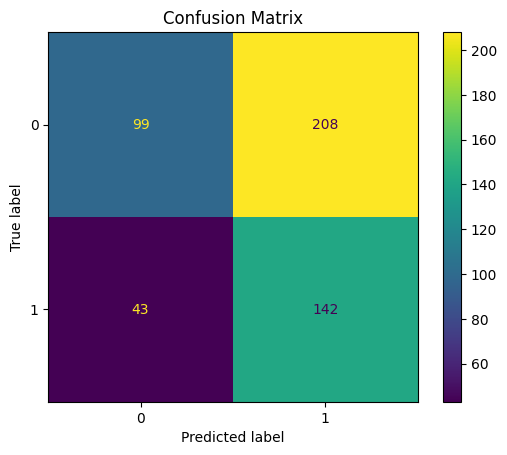

In [35]:
# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

y_pred_flat = y_pred_binary.ravel()
y_test_flat = y_test.to_numpy().ravel()

# Evaluation
cm = confusion_matrix(y_test_flat, y_pred_flat)
report = classification_report(y_test_flat, y_pred_flat)
print(report)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

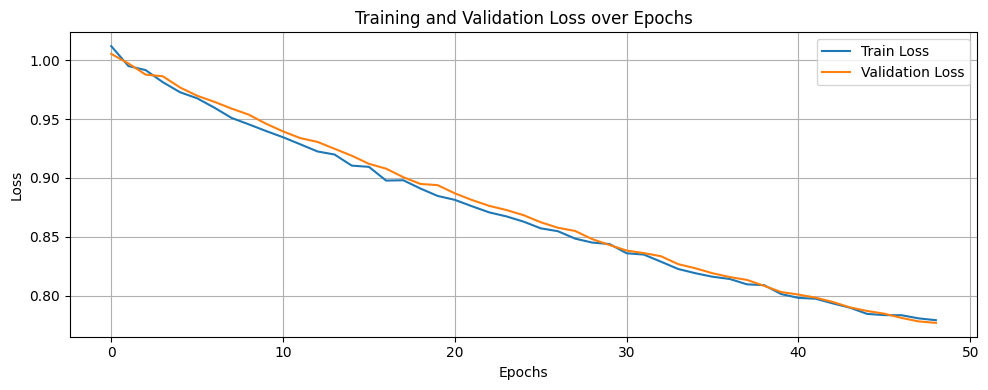

In [39]:
# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


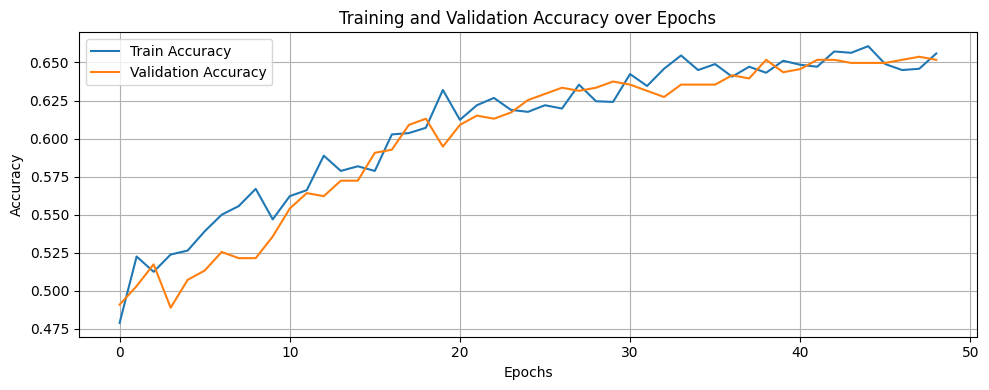

In [42]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


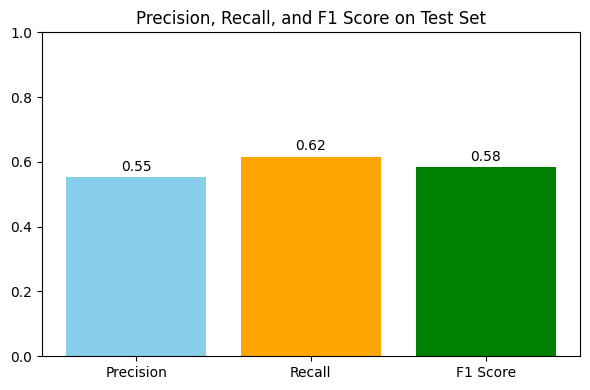

In [44]:
metrics = [precision, recall, f1]
names = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(6, 4))
plt.bar(names, metrics, color=['skyblue', 'orange', 'green'])
plt.ylim([0, 1])
plt.title('Precision, Recall, and F1 Score on Test Set')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


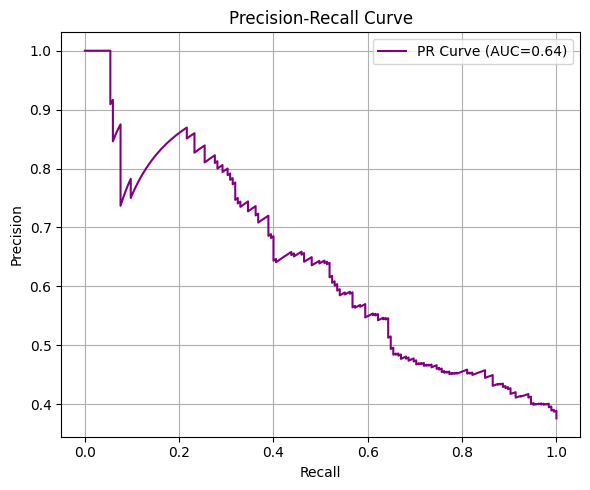

In [45]:
from sklearn.metrics import precision_recall_curve, auc

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test_flat, y_pred_prob.ravel())
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f'PR Curve (AUC={pr_auc:.2f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,996 (19.52 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,499 (9.77 KB)